In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

In [23]:
white_wine = pd.read_csv("winequality-white.csv", sep=";")

print("Dataset Shape:", white_wine.shape)
print(white_wine.head())


Dataset Shape: (4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5      

In [24]:
print("Missing Values:\n", white_wine.isnull().sum())
print("Duplicate Rows:", white_wine.duplicated().sum())


Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Duplicate Rows: 937


In [26]:
def quality_to_class(q):
    if q <= 4:
        return 0   # Low
    elif q <= 6:
        return 1   # Medium
    else:
        return 2   # High
white_wine["quality_class"] = white_wine["quality"].apply(quality_to_class)

print(white_wine["quality_class"].value_counts())


quality_class
1    3655
2    1060
0     183
Name: count, dtype: int64


In [27]:
X = white_wine.drop(["quality", "quality_class"], axis=1)
y = white_wine["quality_class"]


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)


Training Size: (3918, 11)
Testing Size: (980, 11)


In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

In [34]:
y_pred_lr = lr_model.predict(X_test)
# Convert regression output → class
y_pred_lr_class = np.round(y_pred_lr).astype(int)
y_pred_lr_class = np.clip(y_pred_lr_class, 0, 2)

print("Linear Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr_class))

print(classification_report(
    y_test, y_pred_lr_class,
    target_names=["Low", "Medium", "High"]
))


Linear Regression Accuracy: 0.7744897959183673
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        37
      Medium       0.78      0.97      0.87       731
        High       0.71      0.22      0.34       212

    accuracy                           0.77       980
   macro avg       0.50      0.40      0.40       980
weighted avg       0.74      0.77      0.72       980



In [42]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    class_weight="balanced",
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=300,
                       random_state=42)

In [43]:

y_pred_rf = rf_model.predict(X_test)

In [44]:
print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

print(classification_report(
    y_test, y_pred_rf,
    target_names=["Low", "Medium", "High"]
))


Random Forest Accuracy: 0.8448979591836735
              precision    recall  f1-score   support

         Low       0.70      0.19      0.30        37
      Medium       0.86      0.95      0.90       731
        High       0.78      0.61      0.69       212

    accuracy                           0.84       980
   macro avg       0.78      0.58      0.63       980
weighted avg       0.84      0.84      0.83       980



In [45]:
svm_model = SVC(
    kernel="rbf",
    C=10,
    gamma="scale",
    class_weight="balanced"
)

svm_model.fit(X_train, y_train)


SVC(C=10, class_weight='balanced')

In [46]:
y_pred_svm = svm_model.predict(X_test)


In [47]:
print("SVM Accuracy:",
      accuracy_score(y_test, y_pred_svm))

print(classification_report(
    y_test,
    y_pred_svm,
    target_names=["Low", "Medium", "High"]
))


SVM Accuracy: 0.7224489795918367
              precision    recall  f1-score   support

         Low       0.26      0.59      0.36        37
      Medium       0.93      0.69      0.79       731
        High       0.51      0.86      0.64       212

    accuracy                           0.72       980
   macro avg       0.57      0.71      0.60       980
weighted avg       0.82      0.72      0.74       980



In [52]:
print("SVM Classification Report")
print(classification_report(y_test, svm_model.predict(X_test)))

print("Logistic Regression Classification Report")
print(classification_report(y_test, log_model.predict(X_test)))

print("Random Forest Classification Report")
print(classification_report(y_test, rf_model.predict(X_test)))



SVM Classification Report
              precision    recall  f1-score   support

           0       0.26      0.59      0.36        37
           1       0.93      0.69      0.79       731
           2       0.51      0.86      0.64       212

    accuracy                           0.72       980
   macro avg       0.57      0.71      0.60       980
weighted avg       0.82      0.72      0.74       980

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.12      0.19      0.15        37
           1       0.77      0.92      0.84       731
           2       0.37      0.09      0.14       212

    accuracy                           0.71       980
   macro avg       0.42      0.40      0.38       980
weighted avg       0.66      0.71      0.66       980

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.70      0.19      0.30        37
           1       0.86  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


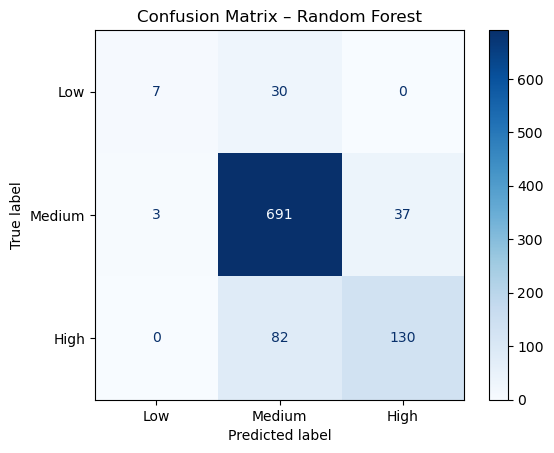

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Low", "Medium", "High"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.show()

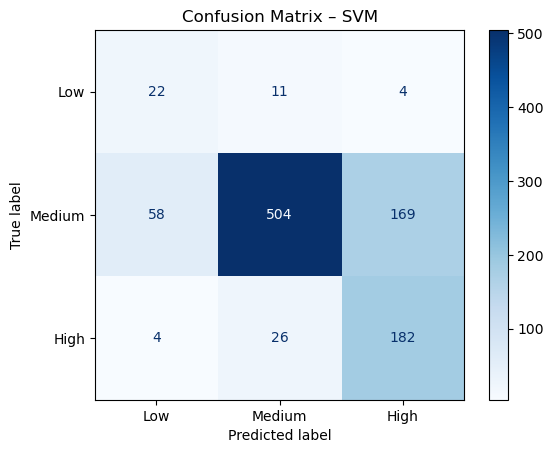

In [53]:
y_pred_svm = svm_model.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)

disp_svm = ConfusionMatrixDisplay(
    confusion_matrix=cm_svm,
    display_labels=["Low", "Medium", "High"]
)

disp_svm.plot(cmap="Blues")
plt.title("Confusion Matrix – SVM")
plt.show()

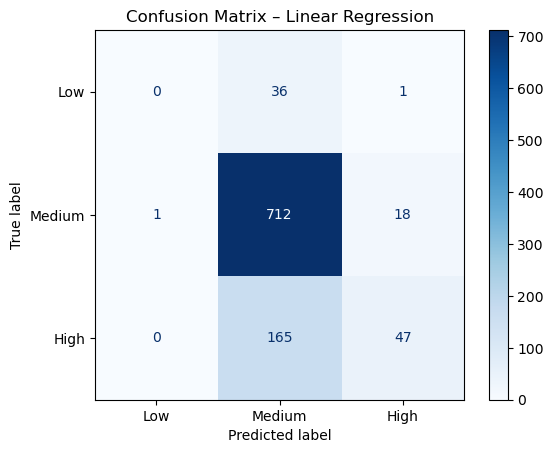

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Linear Regression predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_lr = y_pred_lr.round().clip(0, 2).astype(int)

cm_lr = confusion_matrix(y_test, y_pred_lr)

disp_lr = ConfusionMatrixDisplay(
    confusion_matrix=cm_lr,
    display_labels=["Low", "Medium", "High"]
)

disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix – Linear Regression")
plt.show()


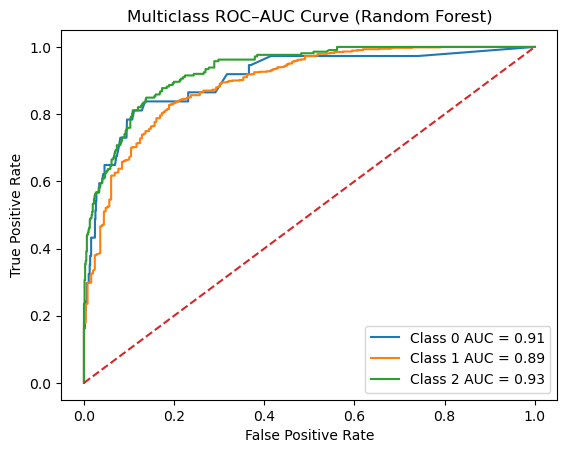

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get predicted probabilities
y_prob_rf = y_pred_rf_proba = rf_model.predict_proba(X_test)

# Number of classes
n_classes = y_test_bin.shape[1]

# Plot ROC curve for each class
plt.figure()

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")

# Diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC–AUC Curve (Random Forest)")
plt.legend()
plt.show()


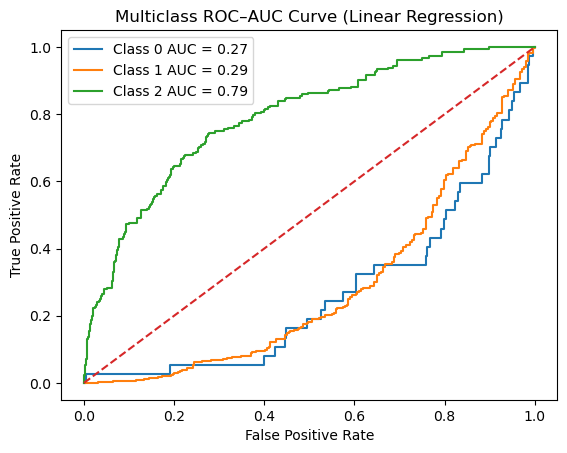

In [58]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get continuous predictions
y_score_lr = lr_model.predict(X_test)

# Normalize scores to [0,1]
y_score_lr = (y_score_lr - y_score_lr.min()) / (y_score_lr.max() - y_score_lr.min())

plt.figure()

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lr)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC–AUC Curve (Linear Regression)")
plt.legend()
plt.show()


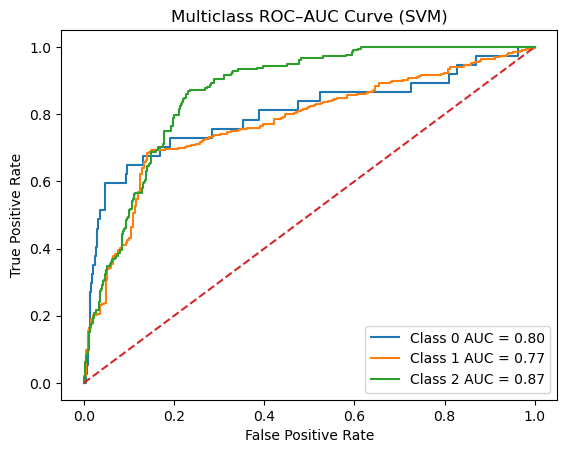

In [61]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get decision scores instead of probabilities
y_score_svm = svm_model.decision_function(X_test)

plt.figure()

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC–AUC Curve (SVM)")
plt.legend()
plt.show()
